In [97]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [163]:
dataset = pd.read_excel('data/inventory_data_new.xlsx')
dataset = dataset.dropna(subset=['stock_final_2023'])

dataset.to_excel('data/inventory_data_stock.xlsx')

In [139]:
dataset = pd.read_excel('data/inventory_data_new.xlsx')
dataset["proporcio_variacio"] =   dataset["preu_venda_unitari_2023"] / dataset["preu_venda_unitari_2022"]

dataset["diferencia_cost_unitari"] =  dataset["cost_unitari_stock_2023"] / dataset["preu_venda_unitari_2023"]
print(dataset.head(100))

       material  unitats_2022  vendes_2022  preu_venda_unitari_2022  \
0   100500401.0         350.0       766.77                 2.190771   
1   100500601.0           NaN          NaN                      NaN   
2   114230204.0      140000.0      8072.60                 0.057661   
3   114230821.0       40000.0      1945.60                 0.048640   
4   114230822.0     1018500.0     54892.49                 0.053895   
..          ...           ...          ...                      ...   
95  133066463.0           0.0         0.00                      NaN   
96  133066482.0     2880000.0     92897.28                 0.032256   
97  133066488.0           NaN          NaN                      NaN   
98  133066491.0     2340000.0     72599.04                 0.031025   
99  133066531.0      108000.0      4206.60                 0.038950   

    unitats_2023  vendes_2023  preu_venda_unitari_2023  \
0          300.0       931.00                 3.103333   
1            NaN          NaN  

In [143]:
cluster_df = dataset.dropna()

In [144]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_df[[ 'proporcio_variacio_preu_venda_unitari_2022_2023', 'diferencia_entrada_sortida','diferencia_cost_unitari']])


C:\Users\Usuario\AppData\Local\Temp\ipykernel_24440\712834343.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['Cluster'] = cluster_labels
C:\Users\Usuario\AppData\Local\Temp\ipykernel_24440\712834343.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['PCA Component 1'] = pca_features[:, 0]
C:\Users\Usuario\AppData\Local\Temp\ipykernel_24440\712834343.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

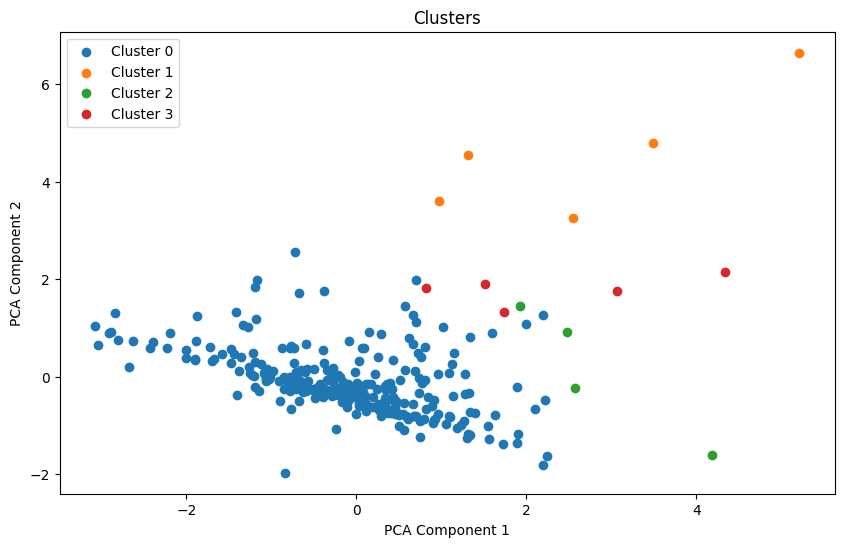

In [149]:
from sklearn.cluster import SpectralClustering

optimal_n_clusters = 4
spectral_clustering = SpectralClustering(n_clusters=optimal_n_clusters, random_state=42)
cluster_labels = spectral_clustering.fit_predict(scaled_features)
cluster_df['Cluster'] = cluster_labels

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
cluster_df['PCA Component 1'] = pca_features[:, 0]
cluster_df['PCA Component 2'] = pca_features[:, 1]
plt.figure(figsize=(10, 6))
for cluster in range(optimal_n_clusters):
    plt.scatter(cluster_df[cluster_df['Cluster'] == cluster]['PCA Component 1'],
                cluster_df[cluster_df['Cluster'] == cluster]['PCA Component 2'],
                label=f'Cluster {cluster}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters')
plt.legend()
plt.show()



IndexError: index 3 is out of bounds for axis 1 with size 3

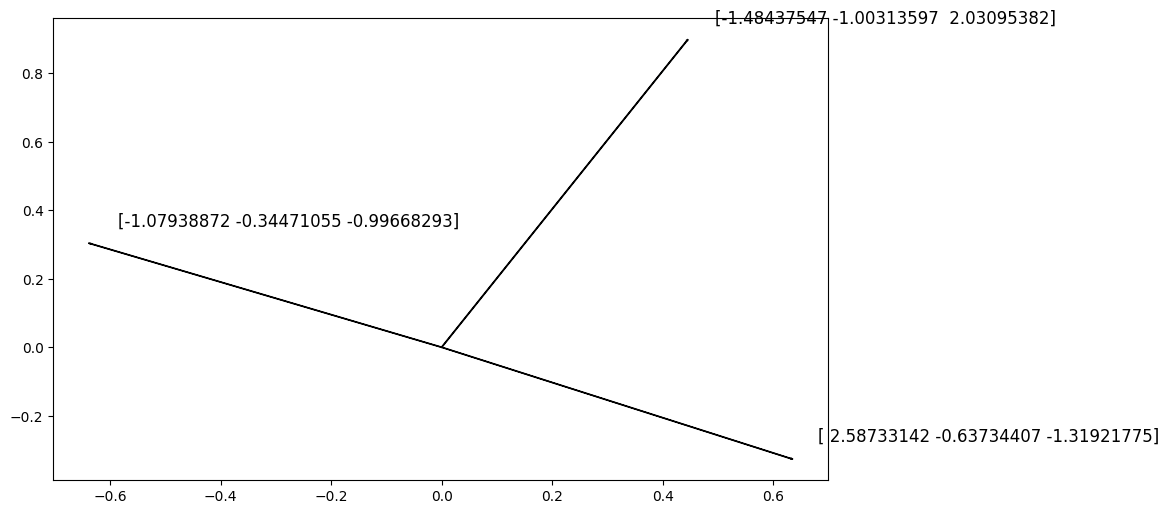

In [162]:
#Per veure els components
plt.figure(figsize=(10, 6))
j = [[],[],[]]
for e in pca.components_:
    for i,k in enumerate(e):
        j[i].append(k)

for i, feature in enumerate(scaled_features):
    
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i])
    plt.text(pca.components_[0, i] + 0.05, pca.components_[1, i] + 0.05, feature, fontsize='12')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Influència')
plt.grid()
plt.show()

In [138]:
print(cluster_df[cluster_df['Cluster'] == 1].head())

        material  unitats_2022  vendes_2022  preu_venda_unitari_2022  \
302  136170330.0     1407450.0    550291.31                 0.390985   
304  136170332.0      154000.0     58701.94                 0.381181   

     unitats_2023  vendes_2023  preu_venda_unitari_2023  \
302      803000.0    286361.39                 0.356614   
304       33000.0     11758.01                 0.356303   

     variacio_preu_venda_unitari_2022_2023  \
302                              -0.034370   
304                              -0.024878   

     proporcio_variacio_preu_venda_unitari_2022_2023 data_darrera_entrada  \
302                                        -0.087907           2024-02-18   
304                                        -0.065266           2024-01-10   

     ...  diferencia_entrada_sortida stock_final_2023  valor_total_stock_2023  \
302  ...                        12.0         113850.0                25872.41   
304  ...                         6.0          40150.0                 91

C:\Users\Usuario\AppData\Local\Temp\ipykernel_24440\3162170942.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['Outlier'] = outlier_labels


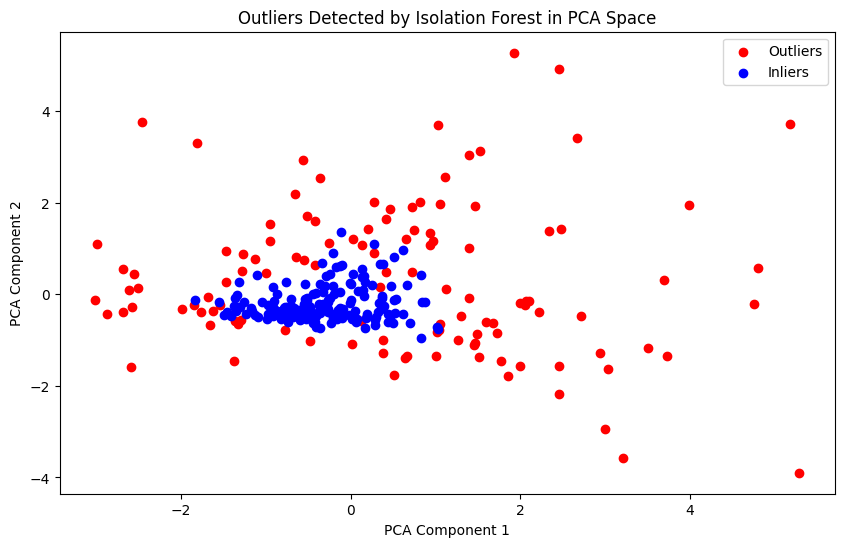

In [134]:
from sklearn.ensemble import IsolationForest

# Isolation Forest per detectar outliers
isolation_forest = IsolationForest(contamination=0.4, random_state=42)
outlier_labels = isolation_forest.fit_predict(scaled_features)
cluster_df['Outlier'] = outlier_labels

# Visualitzem al mateix PCA
plt.figure(figsize=(10, 6))
plt.scatter(cluster_df[cluster_df['Outlier'] == -1]['PCA Component 1'],
            cluster_df[cluster_df['Outlier'] == -1]['PCA Component 2'],
            color='red', label='Outliers')
plt.scatter(cluster_df[cluster_df['Outlier'] == 1]['PCA Component 1'],
            cluster_df[cluster_df['Outlier'] == 1]['PCA Component 2'],
            color='blue', label='Inliers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Outliers Detected by Isolation Forest in PCA Space')
plt.legend()
plt.show()

In [135]:
outliers_df = cluster_df[cluster_df["Outlier"] == -1]

In [136]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(outliers_df[[ 'variacio_preu_venda_unitari_2022_2023', 'proporcio_variacio_preu_venda_unitari_2022_2023', 'diferencia_entrada_sortida', 'dies_ultima_sortida']])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_24440\1084545818.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['Cluster'] = cluster_labels
C:\Users\Usuario\AppData\Local\Temp\ipykernel_24440\1084545818.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['PCA Component 1'] = pca_features[:, 0]
C:\Users\Usuario\AppData\Local\Temp\ipykernel_24440\1084545818.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

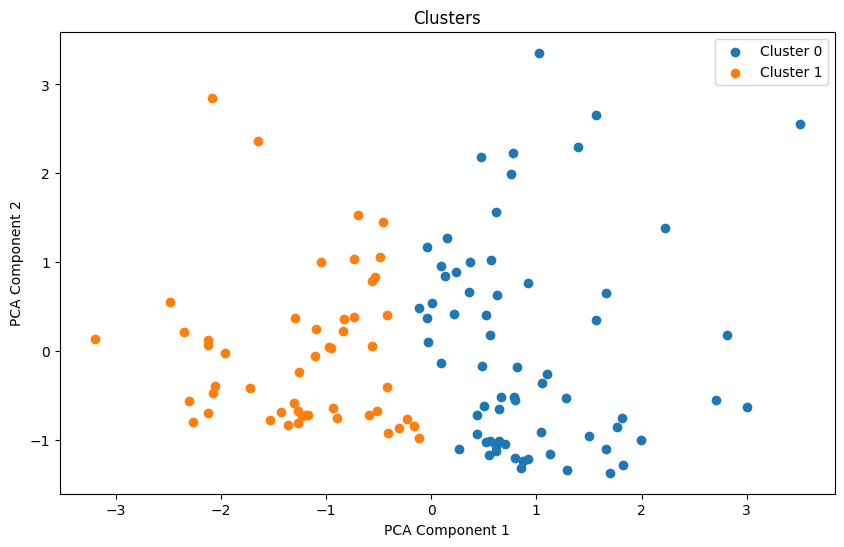

In [137]:
optimal_n_clusters = 2

kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)
outliers_df['Cluster'] = cluster_labels

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
outliers_df['PCA Component 1'] = pca_features[:, 0]
outliers_df['PCA Component 2'] = pca_features[:, 1]
plt.figure(figsize=(10, 6))
for cluster in range(optimal_n_clusters):
    plt.scatter(outliers_df[outliers_df['Cluster'] == cluster]['PCA Component 1'],
                outliers_df[outliers_df['Cluster'] == cluster]['PCA Component 2'],
                label=f'Cluster {cluster}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters')
plt.legend()
plt.show()

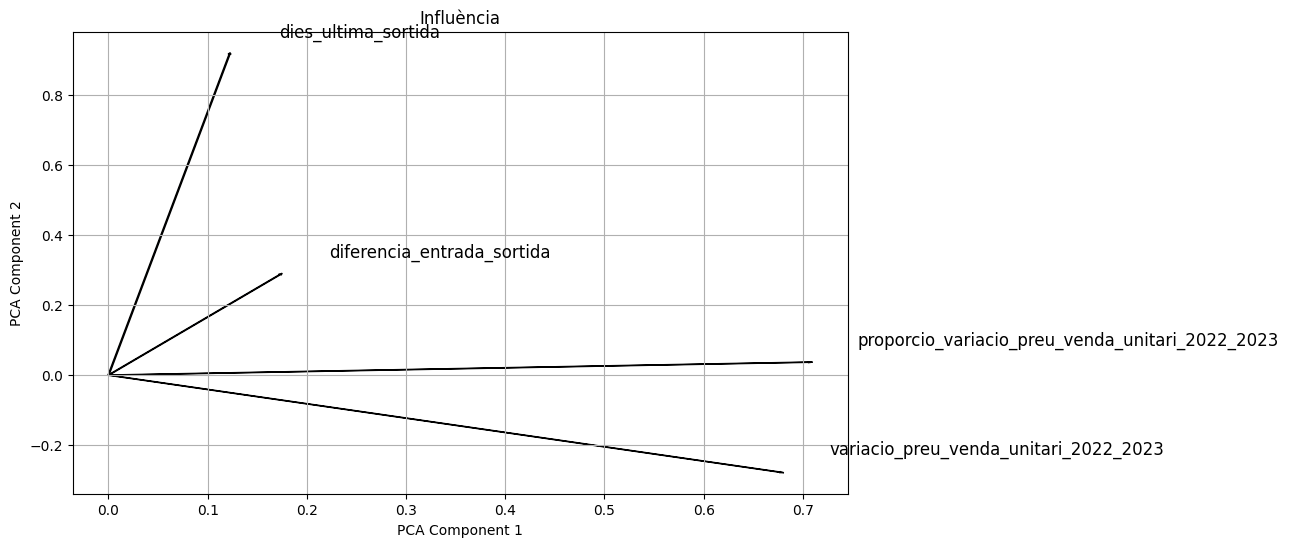

In [46]:
#Per veure els components
plt.figure(figsize=(10, 6))
for i, feature in enumerate([ 'variacio_preu_venda_unitari_2022_2023', 'proporcio_variacio_preu_venda_unitari_2022_2023', 'diferencia_entrada_sortida', 'dies_ultima_sortida']):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i])
    plt.text(pca.components_[0, i] + 0.05, pca.components_[1, i] + 0.05, feature, fontsize='12')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Influència')
plt.grid()
plt.show()

In [48]:
print(outliers_df[outliers_df['Cluster'] == 1].head())

       material  unitats_2022  vendes_2022  preu_venda_unitari_2022  \
10  115030252.0       75900.0      6825.62                 0.089929   
15  115070602.0      884000.0    100307.84                 0.113470   
30  116211401.0      180000.0     20998.44                 0.116658   
61  133062220.0     5952000.0    681966.72                 0.114578   
72  133065207.0     1490400.0     72747.79                 0.048811   

    unitats_2023  vendes_2023  preu_venda_unitari_2023  \
10       27600.0      2127.68                 0.077090   
15      340000.0     34522.45                 0.101537   
30     1533600.0    156152.48                 0.101821   
61     4128000.0    467805.12                 0.113325   
72      900000.0     41220.72                 0.045801   

    variacio_preu_venda_unitari_2022_2023  \
10                              -0.012839   
15                              -0.011934   
30                              -0.014837   
61                              -0.001253   

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


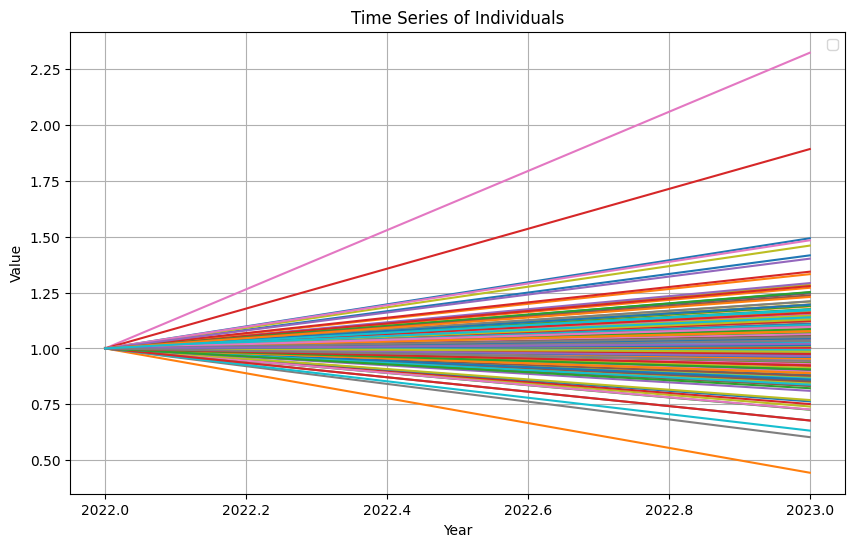

NameError: name 'argmax' is not defined

In [58]:
import matplotlib.pyplot as plt

# Assuming you have your data stored in lists or arrays
variable1_data = dataset["preu_venda_unitari_2022"]
dataset["proporcio_variacio"] =   dataset["preu_venda_unitari_2023"] / dataset["preu_venda_unitari_2022"]

plt.figure(figsize=(10, 6))

for e in range(len(variable1_data)):
    plt.plot([2022, 2023], [1, variable2_data[e]])

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Time Series of Individuals')
plt.legend()
plt.grid(True)
plt.show()




In [77]:
np.argmax(variable2_data)

106

In [87]:
dataset.iloc[np.argmin(variable2_data)]

material                                                   154030105.0
unitats_2022                                                  176000.0
vendes_2022                                                   34065.43
preu_venda_unitari_2022                                       0.193554
unitats_2023                                                  151800.0
vendes_2023                                                   13033.98
preu_venda_unitari_2023                                       0.085863
variacio_preu_venda_unitari_2022_2023                        -0.107691
proporcio_variacio_preu_venda_unitari_2022_2023              -0.556387
data_darrera_entrada                               2023-03-09 00:00:00
dies_ultima_entrada                                              297.0
data_darrera_sortida                               2023-03-15 00:00:00
dies_ultima_sortida                                              291.0
diferencia_entrada_sortida                                         6.0
stock_

In [96]:
dataset[dataset["cost_unitari_stock_2023"] > dataset["preu_venda_unitari_2023"]].iloc[[8]]

,material,unitats_2022,vendes_2022,preu_venda_unitari_2022,unitats_2023,vendes_2023,preu_venda_unitari_2023,variacio_preu_venda_unitari_2022_2023,proporcio_variacio_preu_venda_unitari_2022_2023,data_darrera_entrada,dies_ultima_entrada,data_darrera_sortida,dies_ultima_sortida,diferencia_entrada_sortida,stock_final_2023,valor_total_stock_2023,cost_unitari_stock_2023
612,153110155.0,2756000.0,58779.76,0.021328,988000.0,18048.16,0.018267,-0.003061,-0.1435,2024-02-01,-32.0,2024-02-02,-33.0,1.0,80600.0,1633.76,0.02027
